## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# from sklearn.naive_bayes import BernoulliNB

## load data

In [2]:
df = pd.read_csv("./BreastCancer.csv")

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [4]:
X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

## predicts and confusion matrix functions

In [5]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array):

    model_ = cp.deepcopy(model)
        
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    accuracy = np.empty([0], dtype=int)

    for train_ndx, test_ndx in kfold.split(X):
        # Extracts the rows from the data for the training and testing
        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        # Appends the actual target classifications to actual_classes
        actual_classes = np.append(actual_classes, test_y)
        # Fits the machine learning model using the training data extracted from the current fold
        model_.fit(train_X, train_y)
        # Uses the fitted model to predict the target classifications for the test data in the current fold
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))
        accuracy = np.append(accuracy, accuracy_score(actual_classes, predicted_classes))
        
    return actual_classes, predicted_classes, accuracy.mean()

In [6]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(7,4))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

------------------

# a)

In [7]:
model = MultinomialNB()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

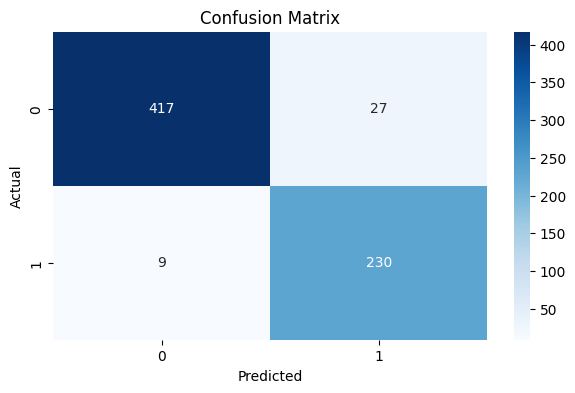

accuracy: 0.9534298581066205


In [8]:
actual_classes, predicted_classes, accuracy = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])
print(f"accuracy: {accuracy}")

--------------

# b)

In [9]:
model = GaussianNB()
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

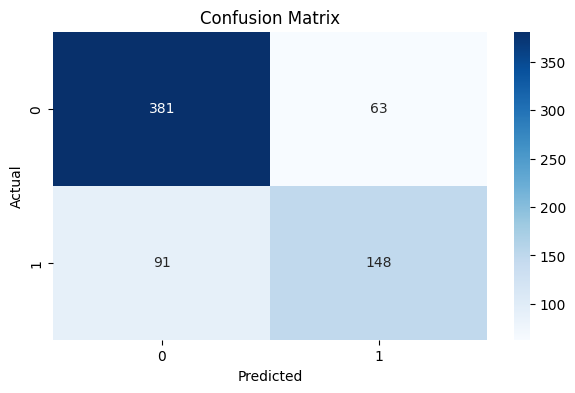

accuracy: 0.7523783322946164


In [10]:
actual_classes, predicted_classes, accuracy = cross_val_predict(model, kfold, X.to_numpy(), y.to_numpy())
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])
print(f"accuracy: {accuracy}")